### Avocado Dataset Analysis and ML Prediction

#### Problem statement:
- Task 1: predicting the Average Price based on different features
- Task 2: predicting the region 

##### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the dataset
df_a=pd.read_csv("project3.csv")
df_a.head() # Will give you first 5 records

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df_a.isnull().sum() # will check the null values

Sno             0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
df_a.shape #shape of dataset

(1517, 14)

In [6]:
df_a.tail() # prints the last 5 rows of the dataset 

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [7]:
df_a.drop("Sno",axis=1,inplace=True) # dropping the unneccesary column "Sno"

In [8]:
#looking for the data types.And we can observe that date is not in datetime 
df_a.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
df_a['Date'] =  pd.to_datetime(df_a['Date'], format='%d-%m-%Y') # converting datatype of Date column from object to datetime

In [10]:
df_a.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [11]:
df_a.describe()  # we can get idea about which column has missing values using this

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


- We can see all columns having count __1517__. Looks like it doesn't contain missing values

In [12]:
df_a["Month"]=df_a["Date"].dt.month # seperating month from date
df_a["day"]=df_a["Date"].dt.day  #seperating day from date

In [13]:
df_a.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


- Now we have make seperate columns for day and month so now visualization will be more clear

##### . 

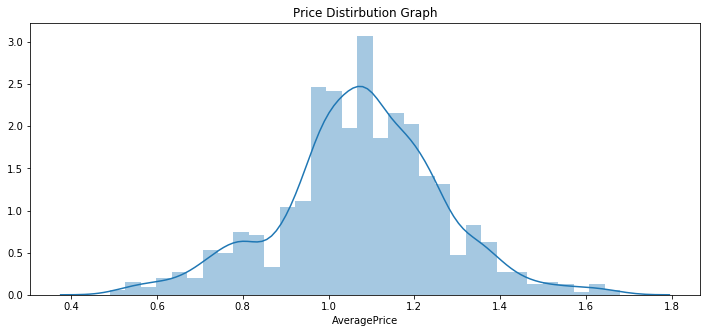

In [14]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(df_a["AveragePrice"],kde=True)

- Average Price distribution shows that for most cases price of avocado is between 1.0, 1.2.

In [15]:
df_a["type"].nunique()

1

- checked the unique values in column type shows that type column consist of only "convential" data, 
- so we can remove this column as there will be no effect as data is same for everyone

###### .

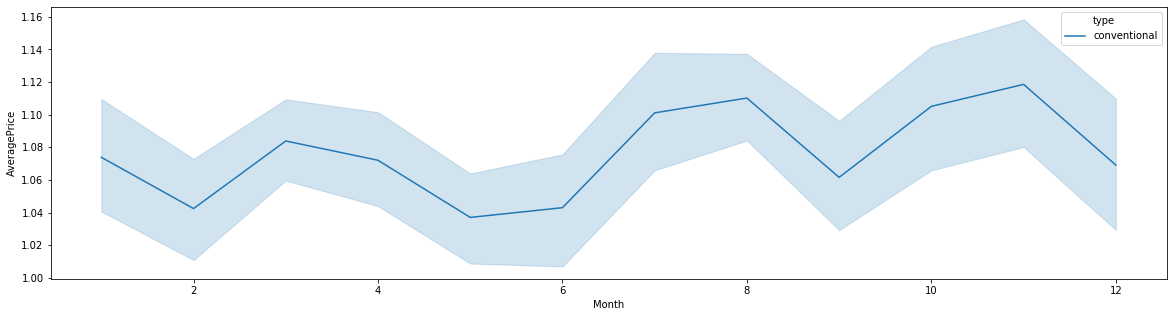

In [16]:
plt.figure(figsize=(20,5))
sns.lineplot(x="Month", y="AveragePrice",hue="type", data=df_a)
plt.show()

- we can see that the avg price during the year it was high in 8th and 11th month 

## Now lets plot Average price distribution based on region


In [17]:
#firstly we need to group region and sum there respective avg price and then plot the graph
reg=df_a.groupby("region")["AveragePrice"].sum()

In [18]:
r=reg.sort_values(ascending=False)

In [19]:
region=r.to_frame()

In [20]:
region=region.reset_index()
region.head()

,region,AveragePrice
0,Albany,82.99
1,California,80.25
2,BaltimoreWashington,75.46
3,Boston,74.74
4,BuffaloRochester,66.38


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

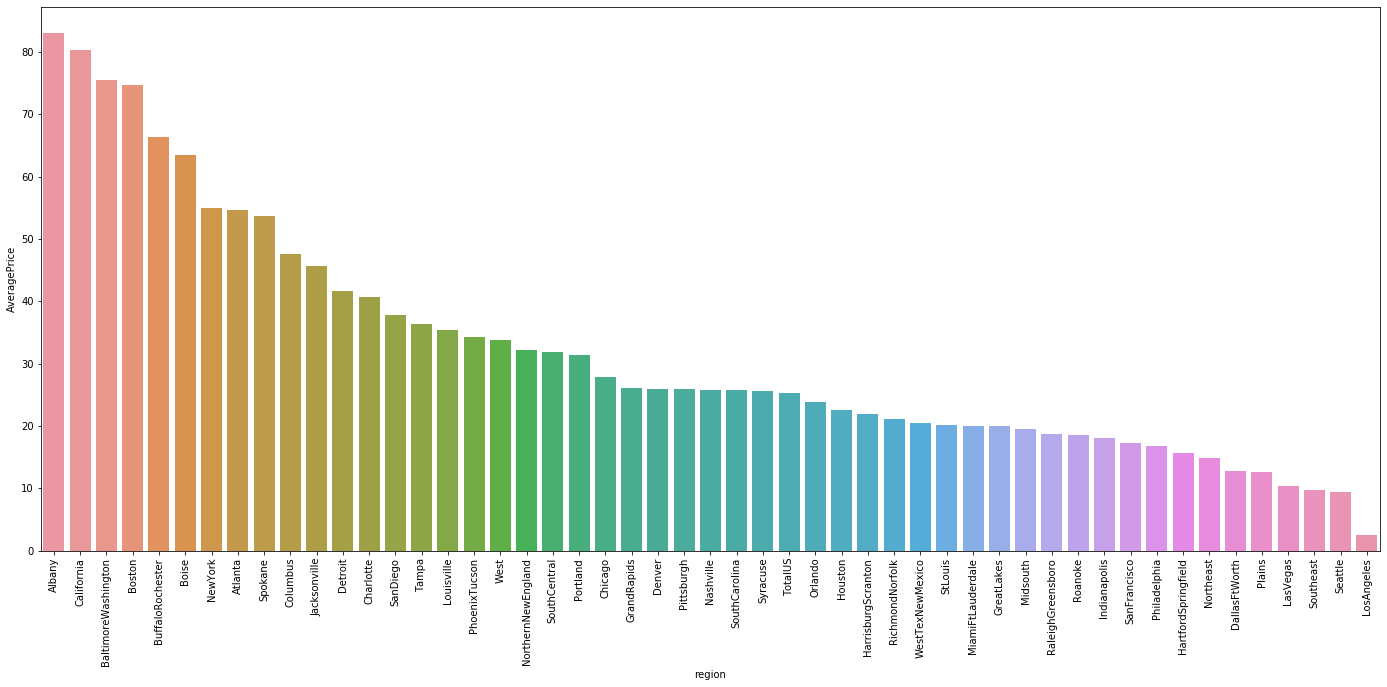

In [21]:
plt.figure(figsize=(24,10))
sns.barplot(x="region",y="AveragePrice",data=region)
plt.xticks(rotation=90)

- These are the region where price is very high which can be seen by gaph and table above
   
    Albany	
	California	
	BaltimoreWashington	
	Boston	
	BuffaloRochester	

###### .

In [22]:
rv=df_a.groupby("region")["Total Volume"].sum()

In [23]:
rv=rv.sort_values(ascending=False)

In [24]:
region_totalvol=rv.to_frame()

In [25]:
region_totalvol=region_totalvol.reset_index()
region_totalvol.head()

,region,Total Volume
0,TotalUS,8.234286e+08
1,California,4.586810e+08
2,SouthCentral,2.143828e+08
3,West,2.006978e+08
4,NewYork,5.997083e+07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

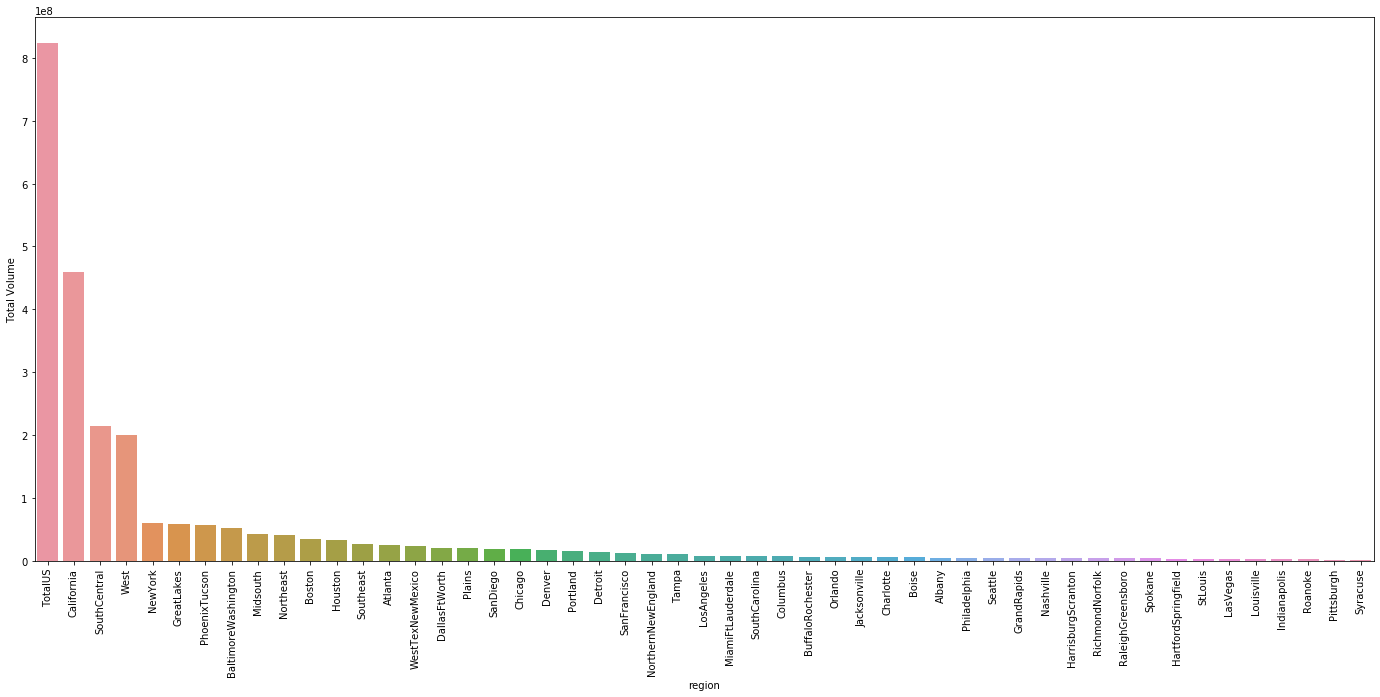

In [26]:
plt.figure(figsize=(24,10))
sns.barplot(x="region",y="Total Volume",data=region_totalvol)
plt.xticks(rotation=90)

- __TotalUS,California,SouthCentral,West__ are the top region in total consumption of avacado

Text(0.5, 1.0, 'Average Price')

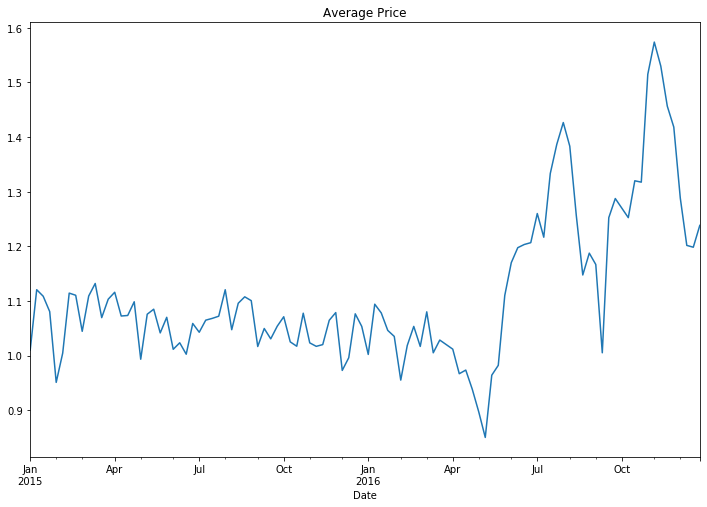

In [27]:
byDate=df_a.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

- This also shows there was a huge hike in prices after __May 2016__

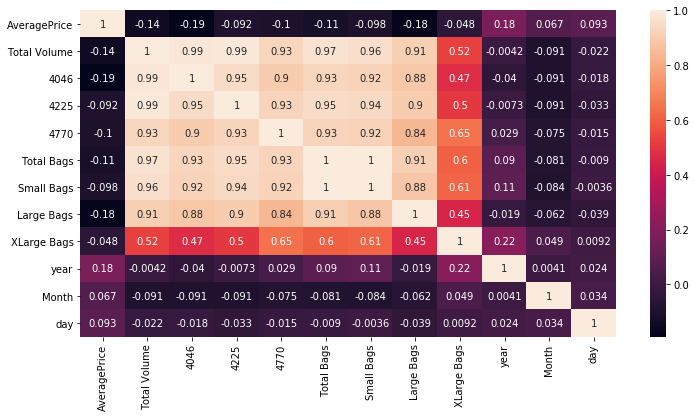

In [28]:
#correlation
plt.figure(figsize=(12,6))
sns.heatmap(df_a.corr(),annot=True)

- most of the features are highly correlated and some are negative but not much so we can consider them as well

## Feature Engineering for Model building

In [29]:
df_a['region'].nunique()

51

In [30]:
df_a['type'].nunique()

1

- As we can see we have 51 regions and 1 unique types,since type column having only one feature so we can drop it,and also for the region its going to be a bit complex, so I decided to drop the entire column.
- I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

In [31]:
df_final=df_a.drop(['region','Date','type'],axis=1)

In [32]:
df_final

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,10,9
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,10,2
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,9,25


In [33]:
#checking the skewnessin the data
df_final.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Month           0.233418
day             0.027740
dtype: float64

In [34]:
# Treating the skewness in the data by log transform

for col in df_final.columns:
    if df_final[col].skew()>0.55:
        df_final[col]=np.log1p(df_final[col])

In [35]:
# after transform again check the sknewness
df_final.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
Month           0.233418
day             0.027740
dtype: float64

## Removing outliners

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df_final))

In [37]:
threshold=3
df_new=df_final[(z<3).all(axis=1)]

In [38]:
print(df_final.shape)
print(df_new.shape)

(1517, 12)
(1502, 12)


- shape of the new data decreases so there were outliners which has been removed

# Task 1: Target variable-->AveragePrice

## Model selection/predictions
- Now our data are ready! lets apply our model which is going to be the Regression techniques because our Target variable 'AveragePrice' is continuous.

In [39]:
df_x=df_new.drop(['AveragePrice'],axis=1)
y=df_new['AveragePrice']
y.values.ravel()

array([1.33, 1.35, 0.93, ..., 1.48, 1.47, 1.43])

In [40]:
y.shape

(1502,)

In [41]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [42]:
# let check again skewness
x.skew()

Total Volume    0.592040
4046           -0.203940
4225            0.122951
4770           -0.371693
Total Bags      0.621617
Small Bags      0.643635
Large Bags     -0.934829
XLarge Bags     0.796336
year            1.838704
Month           0.230761
day             0.026187
dtype: float64

In [43]:
# breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=42)

In [44]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1201, 11)
(1201,)
(301, 11)
(301,)


In [45]:
# importing the model librabries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
#using algorithm with the help of loop
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(train_x,train_y)
    print("score of ",m,"is :",m.score(train_x,train_y))
    pred=m.predict(test_x)
    print("\n")
    print("Errors:")
    print("r2 score is:",r2_score(test_y,pred))
    print("mean absolute error is:",mean_absolute_error(test_y,pred))
    print("mean squared error is:",mean_squared_error(test_y,pred))
    print("Root mean squared error is:",np.sqrt(mean_squared_error(test_y,pred)))
    print("\n")
    print("                                                                  ")
    print("\n")
    

score of  LinearRegression() is : 0.38093065926012737


Errors:
r2 score is: 0.436960091152361
mean absolute error is: 0.11100228674456965
mean squared error is: 0.01899130051634622
Root mean squared error is: 0.1378089275640233


                                                                  


score of  DecisionTreeRegressor() is : 1.0


Errors:
r2 score is: 0.7036161069854834
mean absolute error is: 0.07491694352159468
mean squared error is: 0.00999700996677741
Root mean squared error is: 0.0999850487161826


                                                                  


score of  KNeighborsRegressor() is : 0.8165425068318434


Errors:
r2 score is: 0.7320707730387053
mean absolute error is: 0.07504318936877077
mean squared error is: 0.009037235880398672
Root mean squared error is: 0.09506437755751979


                                                                  


score of  SVR() is : 0.8163985838266257


Errors:
r2 score is: 0.779246336178633
mean absolute error is: 

In [47]:
#using the cross validation
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print("score of ",m,"is:",score)
    print("mean score",score.mean())
    print("standard deviation",score.std())
    print('\n')
    print("           ")
    

score of  LinearRegression() is: [-0.24669678  0.11146182  0.32552992  0.2931178   0.08289396]
mean score 0.11326134488845974
standard deviation 0.2039125082919262


           
score of  DecisionTreeRegressor() is: [-0.89366268 -0.62080516  0.06474121 -0.65058145  0.074198  ]
mean score -0.4052220182343519
standard deviation 0.39898887453743753


           
score of  KNeighborsRegressor() is: [-0.16861866  0.11893976  0.41500355  0.15694868  0.19246203]
mean score 0.1429470734916591
standard deviation 0.18671478602879732


           
score of  SVR() is: [0.03788344 0.45747601 0.59865718 0.18089393 0.15787257]
mean score 0.2865566251298744
standard deviation 0.20793399560065257


           
score of  Lasso() is: [-0.1500728  -0.02498071 -0.01153593 -0.02054949 -0.00825267]
mean score -0.043078322392691513
standard deviation 0.053834262961255736


           
score of  Ridge() is: [-0.22847113  0.10602249  0.32095472  0.29508193  0.07996009]
mean score 0.11470962274179144
standard de

# SVR model is giving best score

In [48]:
#svr is giving best score so now we will find the best parameter for this model
from sklearn.model_selection import GridSearchCV
svr=SVR()
parameters={'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01]}
gss=GridSearchCV(svr,parameters)
gss.fit(x,y)
gss.best_params_

{'C': 0.1, 'gamma': 0.1}

In [49]:
# using svr with best parameter
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=42)
svr=SVR(C=0.1,gamma=0.1)
svr.fit(train_x,train_y)
print("score :",svr.score(train_x,train_y))
pred=svr.predict(test_x)
print("\n")
print("Errors:")
print("r2 score is:",r2_score(test_y,pred))
print("mean absolute error is:",mean_absolute_error(test_y,pred))
print("mean squared error is:",mean_squared_error(test_y,pred))
print("Root mean squared error is:",np.sqrt(mean_squared_error(test_y,pred)))

score : 0.6988454421737094


Errors:
r2 score is: 0.6982877311378214
mean absolute error is: 0.07989738649456556
mean squared error is: 0.010176735747129463
Root mean squared error is: 0.10087980842135587


In [50]:
svr=SVR(C=0.1,gamma=0.1)
score=cross_val_score(svr,x,y,cv=5,scoring='r2')
print("score of ",m,"is:",score)
print("mean score",score.mean())
print("standard deviation",score.std())
print('\n')

score of  ElasticNet() is: [0.31114082 0.51967458 0.50022389 0.29153089 0.17864027]
mean score 0.3602420886614606
standard deviation 0.13047988931020432




# Using ensemble techniques to boost score

In [51]:
#using random forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50,random_state=42)
rf.fit(train_x,train_y)
print("score :",rf.score(train_x,train_y))
pred=rf.predict(test_x)
print("\n")
print("Errors:")
print("r2 score is:",r2_score(test_y,pred))
print("mean absolute error is:",mean_absolute_error(test_y,pred))
print("mean squared error is:",mean_squared_error(test_y,pred))
print("Root mean squared error is:",np.sqrt(mean_squared_error(test_y,pred)))

score : 0.9743268335775985


Errors:
r2 score is: 0.8326808784260036
mean absolute error is: 0.055061129568106285
mean squared error is: 0.0056436633887043145
Root mean squared error is: 0.07512431955568259


In [52]:
# using Ada boost
from sklearn.ensemble import AdaBoostRegressor
svr=SVR()
ab=AdaBoostRegressor(base_estimator=svr,n_estimators=200,learning_rate=0.1,random_state=42)
ab.fit(train_x,train_y)
print("score :",ab.score(train_x,train_y))
pred=ab.predict(test_x)
print("\n")
print("Errors:")
print("r2 score is:",r2_score(test_y,pred))
print("mean absolute error is:",mean_absolute_error(test_y,pred))
print("mean squared error is:",mean_squared_error(test_y,pred))
print("Root mean squared error is:",np.sqrt(mean_squared_error(test_y,pred)))

score : 0.8465403585490661


Errors:
r2 score is: 0.7858712380390642
mean absolute error is: 0.06681098329086374
mean squared error is: 0.0072225495985111954
Root mean squared error is: 0.08498558465122891


- we have use different models and from all of that __RandomForestRegressor__ is giving us best score with much reduce in errors
so we will select this model and save this model

### Best model

In [53]:
# checking again random forest model then go for saving this model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50,random_state=42)
rf.fit(train_x,train_y)
print("score :",rf.score(train_x,train_y))
pred=rf.predict(test_x)
print("\n")
print("Errors:")
print("r2 score is:",r2_score(test_y,pred))
print("mean absolute error is:",mean_absolute_error(test_y,pred))
print("mean squared error is:",mean_squared_error(test_y,pred))
print("Root mean squared error is:",np.sqrt(mean_squared_error(test_y,pred)))

score : 0.9743268335775985


Errors:
r2 score is: 0.8326808784260036
mean absolute error is: 0.055061129568106285
mean squared error is: 0.0056436633887043145
Root mean squared error is: 0.07512431955568259


### Saving the best model

In [54]:
# import the joblib library to save the model
import joblib
joblib.dump(rf,"rf.avacado.pkl")

['rf.avacado.pkl']

###### .

# Task 2: Target variable-->Region

#### Preprocessing

In [55]:
df_a.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [56]:
# target variable is categorical names of region,
# so need to convert in numerical format so using labelencoder so machine can learn the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_a["region"]=le.fit_transform(df_a["region"])

In [57]:
df_a["region"].nunique()

51

In [58]:
#dropping the column name  type and date
df_f=df_a.drop(['type','Date'],axis=1)

In [59]:
#checking the skewness 
df_f.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
Month           0.233418
day             0.027740
dtype: float64

In [60]:
# Treating the skewness in the data by log transform

for col in df_f.columns:
    if df_f[col].skew()>0.55:
        df_f[col]=np.log1p(df_f[col])

In [61]:
df_f.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
region          0.288146
Month           0.233418
day             0.027740
dtype: float64

### Removing outliners

In [62]:
from scipy.stats import zscore
z=np.abs(zscore(df_f))
threshold=3
df_n=df_f[(z<3).all(axis=1)]
print(df_f.shape)
print(df_n.shape)

(1517, 13)
(1502, 13)


- shape of the data decreases after applying zscore so there were outliners which has been removed


## Model selection/predictions
-Now our data are ready! lets apply our model which is going to be the Classification techniques because our Target variable 'Region' is categorical.

In [63]:
df_X=df_n.drop(['region'],axis=1)
Y=df_n['region']
Y.values.ravel()

array([0, 0, 0, ..., 7, 7, 7])

In [64]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(df_X)
X=pd.DataFrame(X,columns=df_X.columns)

In [65]:
X.skew()

AveragePrice   -0.149019
Total Volume    0.592040
4046           -0.203940
4225            0.122951
4770           -0.371693
Total Bags      0.621617
Small Bags      0.643635
Large Bags     -0.934829
XLarge Bags     0.796336
year            1.838704
Month           0.230761
day             0.026187
dtype: float64

In [66]:
# breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=42)

In [67]:
# importing model for classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score

In [68]:
Model=[SVC(),DecisionTreeClassifier(), KNeighborsClassifier()]
for M in Model:
    M.fit(x_train,y_train)
    predm=M.predict(x_test)
    print('\n')
    print("accuracy score of ",M,'is',accuracy_score(y_test,predm))
    print('\n')
    print(confusion_matrix(y_test,predm))
    print('\n')
    print(classification_report(y_test,predm,zero_division=1))
    print('\n')
    print("precision score",precision_score(y_test,predm,average='macro',zero_division=1))
    print("-----------------------------------------------------------------------------------------------------------")



accuracy score of  SVC() is 0.9302325581395349


[[ 9  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  7]]


              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       0.95      1.00      0.97        18
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         7
           9       0.90      1.00      0.95         9
          10       0.67      0.40      0.50         5
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        11
          13       0.80      1.00 

In [69]:
from sklearn.model_selection import cross_val_score
Model=[SVC(),DecisionTreeClassifier(), KNeighborsClassifier()]
for i in Model:
    scores=cross_val_score(i,X,Y,cv=3)
    print("scores of ",i)
    print("mean score",scores.mean())
    print("Standard deviation",scores.std())
    print('\n-------------------------------------------------------------------------------------------------------')

scores of  SVC()
mean score 0.7689673985362608
Standard deviation 0.07050634670679486

-------------------------------------------------------------------------------------------------------
scores of  DecisionTreeClassifier()
mean score 0.6810525615435795
Standard deviation 0.09301581329553958

-------------------------------------------------------------------------------------------------------
scores of  KNeighborsClassifier()
mean score 0.7236899534264803
Standard deviation 0.059989037230141824

-------------------------------------------------------------------------------------------------------


### SVC is giving maximum accuracy

In [70]:
#svr is giving best score so now we will find the best parameter for this model
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01]}
gss=GridSearchCV(svc,parameters)
gss.fit(X,Y)
gss.best_params_

C:\Users\8.1\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 10, 'gamma': 0.1}

In [71]:
# using svr with best parameter
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=42)
svc=SVC(C=10,gamma=0.1)
svc.fit(x_train,y_train)
predm=svc.predict(x_test)
print('\n')
print("accuracy score of ",svc,'is',accuracy_score(y_test,predm))
print('\n')
print(confusion_matrix(y_test,predm))
print('\n')
print(classification_report(y_test,predm,zero_division=1))
print('\n')
print("precision score",precision_score(y_test,predm,average='macro',zero_division=1))




accuracy score of  SVC(C=10, gamma=0.1) is 0.9700996677740864


[[ 9  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  7]]


              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         7
           9       0.90      1.00      0.95         9
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        11
          13       

In [72]:
svc=SVC(C=10,gamma=0.1)
scores=cross_val_score(svc,X,Y,cv=3)
print("score:")
print("mean score",scores.mean())
print("Standard deviation",scores.std())


score:
mean score 0.8448649367930804
Standard deviation 0.055348758936569514


In [73]:
#using random forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,random_state=42)
rfc.fit(x_train,y_train)
predm=rfc.predict(x_test)
print('\n')
print("accuracy score of is",accuracy_score(y_test,predm))
print('\n')
print(confusion_matrix(y_test,predm))
print('\n')
print(classification_report(y_test,predm,zero_division=1))
print('\n')
print("precision score",precision_score(y_test,predm,average='macro',zero_division=1))




accuracy score of is 0.9601328903654485


[[10  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  7]]


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       0.95      1.00      0.97        18
           7       0.86      1.00      0.92         6
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         9
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.

In [74]:
# using Ada boost
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=200,learning_rate=0.1,random_state=42)
abc.fit(x_train,y_train)
predm=abc.predict(x_test)
print('\n')
print("accuracy score of is",accuracy_score(y_test,predm))
print('\n')
print(confusion_matrix(y_test,predm))
print('\n')
print(classification_report(y_test,predm,zero_division=1))
print('\n')
print("precision score",precision_score(y_test,predm,average='macro',zero_division=1))




accuracy score of is 0.5880398671096345


[[ 0  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  4]]


              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.53      1.00      0.70        16
           2       0.65      1.00      0.79        13
           3       0.83      1.00      0.91         5
           4       0.70      1.00      0.82         7
           5       0.86      0.86      0.86         7
           6       1.00      0.72      0.84        18
           7       1.00      0.50      0.67         6
           8       1.00      0.00      0.00         7
           9       0.20      0.11      0.14         9
          10       0.67      0.40      0.50         5
          11       0.67      1.00      0.80         2
          12       1.00      0.00      0.00        11
          13       1.00      1.00      1.

- from all the models used __randomforestclassifier__ is giving best accuracy score.
- so now lets check again the model

#### Best model- Randomforestclassifier

In [75]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,random_state=42)
rfc.fit(x_train,y_train)
predm=rfc.predict(x_test)
print('\n')
print("accuracy score of is",accuracy_score(y_test,predm))
print('\n')
print(confusion_matrix(y_test,predm))
print('\n')
print(classification_report(y_test,predm,zero_division=1))
print('\n')
print("precision score",precision_score(y_test,predm,average='macro',zero_division=1))



accuracy score of is 0.9601328903654485


[[10  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  7]]


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       0.95      1.00      0.97        18
           7       0.86      1.00      0.92         6
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         9
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.

### saving the best model

In [77]:
import joblib
joblib.dump(rfc,"rfc.avacado.pkl")

['rfc.avacado.pkl']

### Conclusion:

- EDA has been carried out using Pandas and other plotting libraries
- Doing preproceesing in dataset helps in dealing with missing values and irregualities present in the data
- Thorough the graph we can analyse the impact of columns like type, year/date on the Average price.
- With the help of zscore also remove outliners which may effect the machine performance.
- In regression techique i use different regression algorithm and also used best param and ensemble methods to avoid overfitting.
- In classification techique,firstly target variable was converted to numeric using Label encoder,then i use different classification algorithm and also used best param and ensemble methods to avoid overfitting and reduce error.
- I came to know through analysis which model will be work with better accuracy with the help of low errors and high accuracy.
- using joblib save the best model for both the task